In [17]:
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
datadir = '/media/nknezek/compute_storage/computed_solutions_Fischer2015/'
all_data = csv.writer(open(datadir+'all_data.csv','w'))
ri05p_data = csv.writer(open(datadir+'ri05p_data.csv','w'))
ri05p_l6000K_data = csv.writer(open(datadir+'ri05p_l6000K_data.csv','w'))
ri10p_data = csv.writer(open(datadir+'ri10p_data.csv','w'))

In [19]:
# percent_ric = 0.05

# tofile = './valid_results/'

for i in [0,1,2,3]:
    reader = csv.reader(open(datadir+'run_data{}.csv'.format(i),'r'))
    for row in reader:
        all_data.writerow(row)
        if np.abs(float(row[1])/1220e3-1) < 0.05:
            ri05p_data.writerow(row)
            if float(row[2])<=6000:
                ri05p_l6000K_data.writerow(row)
        if np.abs(float(row[1])/1220e3-1) < 0.10:
            ri10p_data.writerow(row)
         
#             foldername = "./Tc{:.1f}_XM{:.3f}_XS{:.3f}_XO{:.3f}/".format(float(row[2]), float(row[3]), float(row[4]), float(row[5]))
#             os.system('cp {fr} {to}'.format(fr=foldername, to=tofile))

In [20]:
dfall = pd.read_csv(datadir+'all_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [21]:
dfall['T_cmb0'].unique()

array([4900., 5000., 5100., 5200., 5300., 5500., 5800.])

In [22]:
dfall.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,1.088000e+03,2549.000000,2549.000000,2549.000000,2549.000000,2.549000e+03,2.549000e+03,2.549000e+03,2549.000,2.549000e+03,2549.000000,2549.0,2549.0
mean,1.228782e+06,5121.537858,0.023265,0.124700,0.074967,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2303.973870,100.0,600.0
std,8.562863e+05,245.435226,0.016809,0.017071,0.017085,1.110441e-16,1.110441e-16,5.552204e-17,0.000,0.000000e+00,101.687378,0.0,0.0
min,0.000000e+00,4900.000000,0.000010,0.100000,0.050000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2212.187519,100.0,600.0
25%,0.000000e+00,4900.000000,0.010008,0.110000,0.060000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2212.187519,100.0,600.0
50%,1.502065e+06,5000.000000,0.020006,0.120000,0.070000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2253.618971,100.0,600.0
75%,1.956367e+06,5200.000000,0.040002,0.140000,0.090000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2336.481875,100.0,600.0
max,2.465557e+06,5800.000000,0.050000,0.150000,0.100000,8.000000e-01,9.300000e-01,3.110000e-01,0.015,2.000000e+17,2585.070587,100.0,600.0


# Play with valid solutions within 5%, Tc<6000K

In [23]:
df05l6000 = pd.read_csv(datadir+'ri05p_l6000K_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [24]:
df05l6000.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,3.900000e+01,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.00,39.000,3.900000e+01,3.900000e+01,39.000000,39.0,39.0
mean,1.227964e+06,5269.230769,0.017442,0.123590,0.073590,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2365.165188,100.0,600.0
std,3.113714e+04,92.206422,0.005485,0.016778,0.016778,1.124736e-16,0.00,0.000,1.757401e-18,0.000000e+00,38.202460,0.0,0.0
min,1.169423e+06,5200.000000,0.010008,0.100000,0.050000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
25%,1.200745e+06,5200.000000,0.010008,0.110000,0.060000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
50%,1.227038e+06,5200.000000,0.020006,0.120000,0.080000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
75%,1.254287e+06,5300.000000,0.020006,0.140000,0.090000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2377.913327,100.0,600.0
max,1.272957e+06,5500.000000,0.030004,0.150000,0.100000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2460.776231,100.0,600.0


# Play with valid solutions within 5%

In [25]:
df05 = pd.read_csv(datadir+'ri05p_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [26]:
df05.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,3.900000e+01,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.00,39.000,3.900000e+01,3.900000e+01,39.000000,39.0,39.0
mean,1.227964e+06,5269.230769,0.017442,0.123590,0.073590,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2365.165188,100.0,600.0
std,3.113714e+04,92.206422,0.005485,0.016778,0.016778,1.124736e-16,0.00,0.000,1.757401e-18,0.000000e+00,38.202460,0.0,0.0
min,1.169423e+06,5200.000000,0.010008,0.100000,0.050000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
25%,1.200745e+06,5200.000000,0.010008,0.110000,0.060000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
50%,1.227038e+06,5200.000000,0.020006,0.120000,0.080000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
75%,1.254287e+06,5300.000000,0.020006,0.140000,0.090000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2377.913327,100.0,600.0
max,1.272957e+06,5500.000000,0.030004,0.150000,0.100000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2460.776231,100.0,600.0


In [27]:
df05['T_cmb0'].unique()

array([5200., 5300., 5500.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85119d2128>]],
      dtype=object)

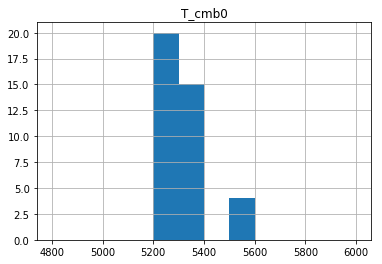

In [28]:
df05.hist('T_cmb0',bins=np.linspace(4800,6000,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76e759d588>]],
      dtype=object)

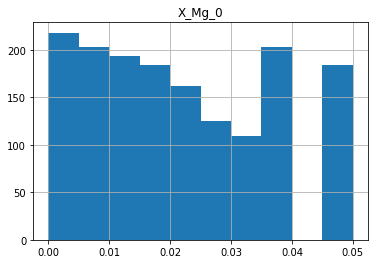

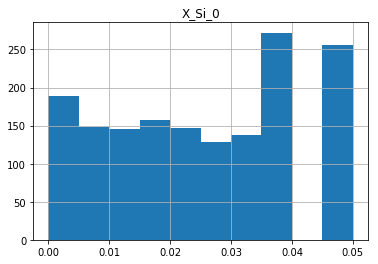

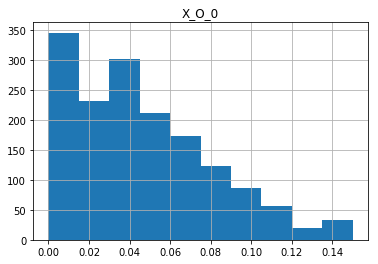

In [36]:
df05.hist('X_Mg_0')
df05.hist('X_Si_0')
df05.hist('X_O_0')

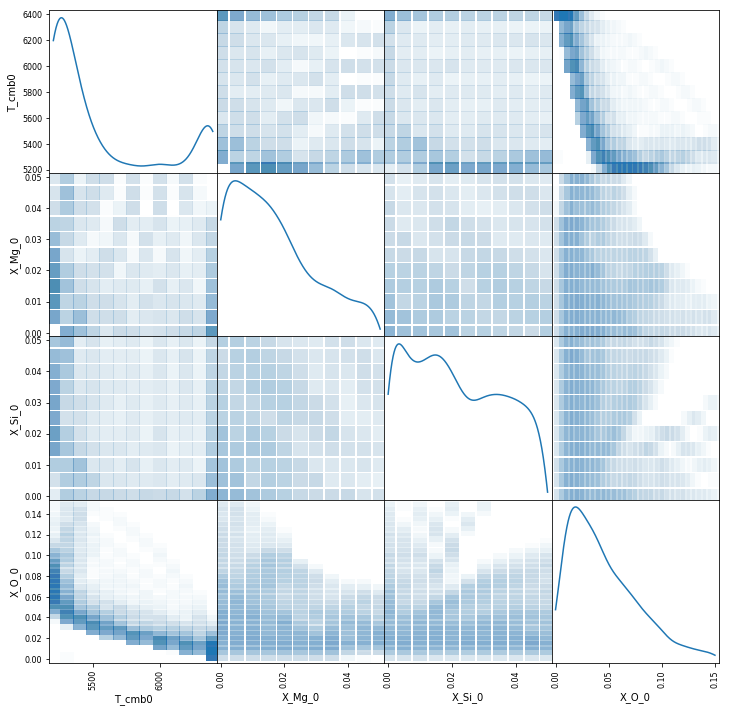

In [37]:
pd.plotting.scatter_matrix(df05[['T_cmb0','X_Mg_0','X_Si_0','X_O_0']], alpha=0.02, figsize=(12, 12), diagonal='kde', marker='s', s=200)
plt.savefig('ri05p_scatter_matrix.pdf')

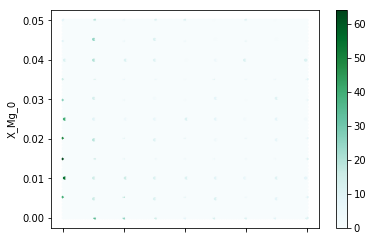

In [24]:
df05.plot(kind='hexbin', x='T_cmb0',y='X_Mg_0',)

# Play with valid solutions within 10%

In [29]:
df10 = pd.read_csv(datadir+'ri10p_data.csv', names=['time', 'r_i', 'T_cmb0', 'X_Mg_0', 'X_Si_0', 'X_O_0', 'MgNumFp', 'MgNumPv', 'X_MgFeO_b', 'X_SiO2_b', 'nu_present', 'deltaT0', 'layer_thickness', 'overturn'])

In [30]:
df10.describe()

,r_i,T_cmb0,X_Mg_0,X_Si_0,X_O_0,MgNumFp,MgNumPv,X_MgFeO_b,X_SiO2_b,nu_present,deltaT0,layer_thickness,overturn
count,4.600000e+01,46.000000,46.000000,46.000000,46.000000,4.600000e+01,46.00,46.000,4.600000e+01,4.600000e+01,46.000000,46.0,46.0
mean,1.228594e+06,5284.782609,0.016746,0.126522,0.076522,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2371.608541,100.0,600.0
std,7.659393e+04,89.361665,0.007902,0.016629,0.018162,4.489964e-16,0.00,0.000,1.753892e-18,0.000000e+00,37.023836,0.0,0.0
min,1.103949e+06,5200.000000,0.010008,0.100000,0.050000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
25%,1.150139e+06,5200.000000,0.010008,0.110000,0.060000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2336.481875,100.0,600.0
50%,1.250948e+06,5300.000000,0.010008,0.130000,0.080000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2377.913327,100.0,600.0
75%,1.291001e+06,5300.000000,0.020006,0.140000,0.090000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2377.913327,100.0,600.0
max,1.341988e+06,5500.000000,0.030004,0.150000,0.100000,8.000000e-01,0.93,0.311,1.500000e-02,2.000000e+17,2460.776231,100.0,600.0


In [40]:
df10['T_cmb0'].unique()

array([5100., 5200., 5300., 5400., 5500., 5600., 5700., 5800., 5900.,
       6000., 6100., 6200., 6300., 6400., 6500.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f851c2bdac8>,
      dtype=object)

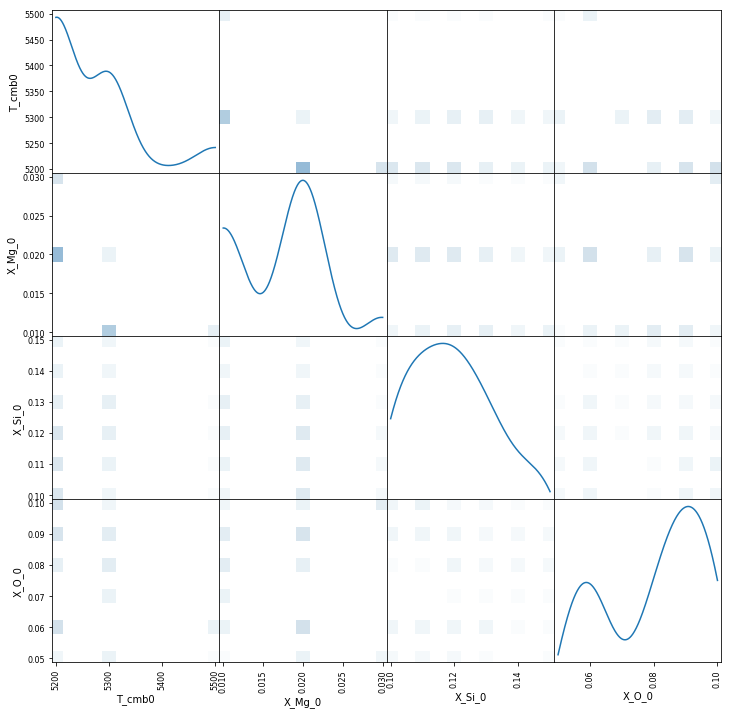

In [16]:
pd.plotting.scatter_matrix(df10[['T_cmb0','X_Mg_0','X_Si_0','X_O_0']], alpha=0.02, figsize=(12, 12), diagonal='kde', marker='s', s=200)
# plt.savefig('ri10p_scatter_matrix.pdf')